# Red Neuronal de reconocimento facial

### El proyecto consiste en una red neuronal que recibe imagenes de entrada para entrenamiento (donde se indica los nombres de las personas de cada imagen) de la misma red, posteriormente se introducen imagenes de prueba, sin nombres, para que la red neuronal indique el nombre de la persona

#### Conozcan a Riho takada:
![title](RihoTakadaFULL.jpg)

#### Y a Rui Kiriyama:
![Rui](RuiKiriyamaFULL.jpg)
(Si... un poco pervertido el asunto, pero #YOLO)

#### Quienes serán nuestras modelos, se entrenará la red con una variedad de imagenes de ellas, incluyendo el nombre para que esta aprenda a hacer el reconocimiento facial.
#### Por simplicidad, nos ahorramos el paso de detección facial (es decir, de una foto completa, que el algoritmo encuentre el rosto) y solamente pasaremos el rostro para hacer el entrenamiento. Si sobra tiempo, realizaremos también la detección facial
#### Las imagenes se pasarán en un formato .png con un tamaño de 300 x 300 px
### ACTUALIZACIÓN:
#### Las imagenes se van a pasar en formato .png con tamaño de 30 x 30 px, inicialmente se pasará cada pixel como entrada a la red neuronal

# Creación de la red 

## (Primer objetivo propuesto)

In [2]:
import numpy as np

#La red neuronal 
#Primero hay que calcular feed-forward
#Después hay que calcular el error
#Ya calculado el error se realiza el back-propagation
#Se actualizan los pesos        

class neuralnet:
    def __init__(self, inpn):
        self.inputneurons=inpn #Numero de neuronas de entrada
        self.outputneurons=2 #Numero de neuronas de salida, como ya sé que van a ser sólo dos, de una vez la fijo en 2
        
        #Iniciamos las capas ocultas como un arreglo de zeros
        #Iniciamos los pesos
        self.w1=np.random.randn(inpn, inpn)
        self.w2=np.random.randn(inpn, inpn)
        self.w3=np.random.randn(inpn, inpn)
        self.w4=np.random.randn(inpn, 2)
        
    #Función sigmoide
    def sigmoid(self, x, d):
        """
        Función sigmoide
        Entrada: variable flotante X (valor inicial de una neurona de la capa oculta), booleano D para definir si queremos la derivada o la función original
        Salida: el resultado de aplicar a X la función sigmoide (o su derivada)
        """
        if (d == True):
            return x*(1-x)
        else:
            return 1/(1+np.exp(-x))
    
    #Para entrenar la red, recibe un ejemplo de entrenamiento y el número de epocas de entrenamiento deseadas, de preferencia arriba de 10000
    #UTILIZAREMOS 3 CAPAS OCULTAS, COMO AÚN NO EXTRAEMOS LAS CARACTERÍSTICAS DE LAS IMAGENES, ESTO SE VA A DESCONTROLAR FEO
    def train(self, inputarr, Y, epoch):
        #PRIMERA PRUEBA, QUE CADA PIXEL DE LA ENTRADA SEA UNA NEURONA DE ENTRADA
        X=inputarr.flatten().reshape(1,self.inputneurons)
        graphvar=[]
        for e in range(epoch):
            #Feed-forward
            h0 = self.sigmoid(np.dot(X, self.w1), False)
            h1 = self.sigmoid(np.dot(h0, self.w2), False)
            h2 = self.sigmoid(np.dot(h1, self.w3), False)
            Outl = self.sigmoid(np.dot(h2, self.w4), False)
            
            #Calculo de error
            error_calc= Y - Outl
            
            #BonitoDebug
            if (e%1000==0):
                graphvar.append(np.mean(np.abs(error_calc)))
                print("Error medio: " + str(np.mean(np.abs(error_calc))))
                
            #Back-Propagation
            outDelta = error_calc*self.sigmoid(Outl, True)            
            h2err = outDelta.dot(self.w4.T)
            h2Delta = h2err * self.sigmoid(h2, True)
            h1err = h2Delta.dot(self.w3.T)
            h1Delta = h1err * self.sigmoid(h1, True)
            h0err = h1Delta.dot(self.w2.T)
            h0Delta = h0err * self.sigmoid(h0, True)
            
            #Actualización de pesos
            self.w1+=X.T.dot(h0Delta)
            self.w2+=h0.T.dot(h1Delta)
            self.w3+=h1.T.dot(h2Delta)
            self.w4+=h2.T.dot(outDelta)
        
        #Para efectos prácticos graficaremos esta babosada, a ver si está aprendiendo o no
        graphx=[i for i in range(len(graphvar))]
        plt.plot(graphx, graphvar)
        
    def test(self, testarr):
        X=testarr.flatten().reshape(1,self.inputneurons)
        l0 = self.sigmoid(np.dot(X, self.w1), False)
        l1 = self.sigmoid(np.dot(l0, self.w2), False)
        l2 = self.sigmoid(np.dot(l1, self.w3), False)
        self.pred_o = self.sigmoid(np.dot(l2, self.w4), False)
        if (self.pred_o[0][0]>self.pred_o[0][1]):
            print("Predicción: Rui Kiriyama")
        else:
            print("Predicción: Takada Riho")
        

###### Como hacer que Python abra imagenes sin morir en el intento

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def Abrir(imtype, nom):
    """
    Función abrir: Se utiliza para abrir una imagen dado el nombre del archivo (string)
    Entrada: imtype variable para definir si queremos abrir una imagen de entramiento (train) o de prueba (test)
    Salida: Un objeto imagen matplotlib
    """
    if (imtype=='train'):
        prefix='TrainSamples/'
    elif (imtype=='test'):
        prefix='TestSamples/'
    else:
        print("Error, prefijo incorrecto: debe ser 'train' o 'test'")
    return mpimg.imread(prefix+nom+'.png')

#Probemos la wea anterior
#Algo flojo, pero para ya no poner las comillas sencillas
train='train'
test='test'

In [69]:
'''
    Ya que vimos que si funciona esto, tenemos que asociar el nombre a cada imagen, lo ideal sería crear objetos de entrenamiento
    donde podamos poner absolutamente TODA la información relevante de las imagenes, como nombre, características, y la misma imagen obviamente
'''

#TODO: Extraer las características 
class TrainingElem:
    #Acá irán las demás features
    def __init__(self, name, tipo, path):
        self.name=name
        self.img=Abrir(tipo, path)

#### DE MOMENTO
##### Hicimos que la entrada sea forzosa de 30 x 30 pixeles, para la primera prueba entrenaremos la red pasando cada pixel como valor de entrada es decir, tendremos 900 neuronas de entrad; además usaremos 3 capas ocultas, para que no sea tan simple.
##### Como tenemos 2 modelos, sólo habrá 2 neuronas de salida: 1.- Rui Kiriyama : 2.- Riho Takada, en dado caso que la foto de la imagen correspondiera a una, se espera que la neurona de salida correspondiente tenga un 1 y la otra neurona un 0, es de aquí donde comenzaremos a corregir el error y modificar los pesos para entrenar la red

In [70]:
#Probemos un ejemplo, a ver si sirve la red neuronal
#red=neuralnet(size)
#Para la Y = Y[0] Rui Kiriyama, Y[1] = Riho Takada
#ADVERTENCIA, COMO YA TIENE 3 CAPAS OCULTAS Y AÚN NO EXTRAEMOS CARACTERÍSTICAS DE LA IMAGEN, EL PROCESO ES MUY TARDADO
#red.train(img[:,:,0], [1,0], 10000)
#red.train(img2[:,:,0], [0,1], 10000)
#red.test(img2[:,:,0])
#imgplot = plt.imshow(img2)
#print(red.pred_o)

# Extracción de características

### (Segundo objetivo propuesto)

Hasta ahorita ya cumplimos el primer objetivo (crear la red neuronal), la cuál se instancia como un objeto y cuenta con sus métodos para entrenar y para probar con simplemente pasarle una imagen, la cuál se "rompe" de momento en pixeles los cuáles "alimentan" la red neuronal como valores de entrada.

Sin embargo, este método no es eficiente ni óptimo, entrenar la red neuronal con tan solo 1 ejemplo de entrenamiento tarda mucho tiempo, esto se vuelve muy torpe al querer introducir varios ejemplos de entrenamiento, además que la salida que "predice" no es muy acertada.

Para esto (tras realizar un poco de investigación) utilizaremos "Eigenfaces"

## Eigenfaces

El concepto consiste en un conjunto de eigenvectores (vectorer característicos de una transformación lineal -> un poco de álgebra lineal), los cuales forman un conjunto base de todas las imágenes utilizadas para construir una matriz de covarianza (a su vez, estos se derivan de esta, de la distribución de probabilidad del espacio vectorial de imágenes de rostros)

### Cómo generarlas

Un conjunto de eigenfaces se puede generar aplicando un proceso matemático llamado "Análisis de componente principal" (PCA) en un conjunto de imágenes. Por ejemplo: un rostro se puede generar del "rostro promedio" + 10%, 55%,  -3% de las eigenfaces 1, 2 y 3 respectivamente.

*Se suponen M imágenes de entrenamiento
*K eigenfaces más significativas usandolas podemos satisfactoriamente aproximar una cara por lo que K < M
*Todas las imágenes son matrices N x N, que se pueden representar como vectores N^2 x 1 dimensionales

##### Dicho lo anterior el algoritmo dice:
1.- Obtener M imágenes de entrenamiento I1, I2, ..., IM <br>
2.- Representar cada imágen Ii como vector (G) (tal como se mencionó anteriormente)<br>
3.- Encontrar el vector de rostro promedio Psi = 1/M * SUM(i=1, M) Gi<br>
4.- Sustraer la "cara media" de cada vector Gi para obtener un conjunto de vectores Phi_i (Al hacer esto nos quedamos sólo con las características que distinguen cara cara, removiendo de una forma información común) (esto es Phi_i = Gi - Psi).<br>
5.- Encontrar matriz de Covarianza C: C=AA^t donde A=[Phi1, Phi2, ..., PhiM].<br>
6.- Calcular los Eigenvectores u_i de C, como C es una matriz de N^2 x N^2, debería regresar N^2 eigenvectores, cada uno siendo N^2 dimensional: Considerar la matriz (A^t)A, si encontramos los eigenvectores de esta matriz, debería regresar M eigvenvectores, cada uno de dimensión M x 1, esto lo denominaremos eigenvectores v_i.<br>
De lo anterior se sigue que: u_i = Av_i. Esto implica que usando v_i podemos calcular los M eigenvectores más grandes de AA^t. (Recordar que M es simplemente el número de imagenes de entrenamiento).<br>
7.- Encontrar los mejores M eigenvectores de C=AA^t usando u_i = Av_i: Teniendo en mente que ||u_i||=1.<br>
8.- Selecionar los mejores K Eigenvectores (esto se hace heuristicamente).<br>

##### Nota:
Los eigenvectores encontrados por el algoritmo, cuando se convierten en una matriz en un proceso de reversa al paso 2, tienen una apariencia similar a la de un rostro. Como estos son eigenvectores que tienen una apariencia como de una cara, se les llaman "Eigenfaces". Dato curioso que encontré en un blog (del cuál saqué el algoritmo) A veces también se les llama Imágenes de fantasmas por sus apariencias SINIESTRAS y Perturbadoras: Fuente: https://onionesquereality.wordpress.com/2009/02/11/face-recognition-using-eigenfaces-and-distance-classifiers-a-tutorial/

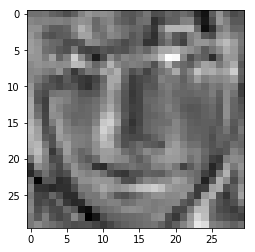

In [73]:
from PIL import Image
#Intentemos hacer el código para generar las eigenfaces
def eigenface(im_vec, size):
    """
    Función eigenface - Se utiliza para calcular las eigenfaces
    Entrada: Vector de imágenes de entrenamiento (PASO 1)
    Salida: Vector de eigenfaces
    """
    G=[] #El vector de las I's
    Phi=[] #El vector Phi, el de las características que distinguen a cada cara
    #Primero "Aplanamos" todos los vectores de im_vec (PASO 2)
    for im in im_vec:
        g=im.flatten().reshape(1,size)
        G.append(g)
    #Ahorita el vector I debe ser de tamaño M
    M=len(G)
    #Encontramos el vector de rostro promedio (PASO 3)
    psi=np.sum(G, axis=0)/M
    #Sustraer la "Cara media" de cada vector Gi para obtener un conjunto de vectores Phi (PASO 4)
    for g in G:
        p=g-psi
        Phi.append(p)
    #Encontrar Matriz de Covarianza (Paso 5)
    Aux=[]
    for ph in Phi:
        Aux.append(ph[0])
    A=np.vstack(Phi)
    C=np.cov(A)
    Aux=np.array(Aux)
    C=np.matrix(Aux.transpose())*np.matrix(Aux)
    C/=M
    #Calcular los Eigenvectores u de C (PASO 6)
    L=np.matrix(Aux)*Aux.transpose()
    #print(L.shape)
    eig, sig, v = np.linalg.svd(Aux.transpose(), full_matrices=False)
    #Veo que todos los algoritmos calculan aquí los pesos, hagamoslo:
    w=np.dot(Aux, eig)
    return [eig, w, psi]
    
numbers=[]
for i in range(1, 10):
    numbers.append('00'+str(i))
    numbers.append('10'+str(i))

for i in range(10, 16):
    numbers.append('0'+str(i))
    numbers.append('1'+str(i))

imarr=[]
for i in range(len(numbers)):
    imarr.append(Abrir(train, numbers[i]))

G=[]
for i in imarr:
    G.append(i[:,:,0])
    
eig, w, Med = eigenface(G, 900)

efv=[]
for i in range(len(eig[0])):
    t=np.reshape(eig[:,i], (30,30))
    efv.append(t)

#Con lo anterior ya tenemos las eigenfaces convenientemente en un arreglo
plt.imshow(efv[22], cmap = plt.get_cmap('gray'))

# Volvamos a intentar entrenar la red
Ahora que tenemos caras características, intentaremos de nuevo entrenar la red pero ahora usando las caras características
Básicamente en este punto se podría decir que ya logramos el objetivo del programa (pongame 10 profe), pero todavía se puede refinar, lo que quiere decir que, de aquí a la fecha de entrega intentaré optimizarlo lo más que pueda (obtener correctamente las eigenfaces)

### Ahora el paradigma es, cómo alimentaremos a la red neuronal con esta información (cumplimos a tiempo los primeros objetivos propuestos, pero llega este nuevo objetivo a cubrir un hueco para la siguiente semana)

In [1]:
#Recordemos que tenemos el vector eig que contiene todas las caras características
#size=900 #No necesitamos generalizar el caso por que ya sabemos que las caras son de 30 x 30
#red=neuralnet(size)
#Para la Y = Y[0] Rui Kiriyama, Y[1] = Riho Takada
#Las imágenes para entrenar están de la siguiente manera: rui, riho, rui, riho... 
#hagamos un arreglo sencillo para pasar esta información a la red
#answersvec=[]
#for i in range(30):
#    if (i%2==0):
#        answersvec.append([1,0])
#    else:
#        answersvec.append([0,1])

#cont=0
#for e in eig:
#    red.train(e, answersvec[cont], 10000)
#    cont+=1
#Igual esto tardará años, veamos como se porta el algoritmo